## Exercice 1
Considérons le problème de programmation linéaire suivant

\begin{align*}
\max_x\ & 1000 x_1 + 1200 x_2 \\
\text{t.q. } & 8x_1 + 4x_2 \leq 160 \\
& 4x_1 + 6x_2 \leq 120 \\
& x_1 \leq 34 \\
& x_2 \leq 14 \\
& x_1, x_2 \geq 0.
\end{align*}

In [1]:
using JuMP, HiGHS

In [2]:
mo = Model(HiGHS.Optimizer)
@variable(mo, 0<=x[1:2])
@constraint(mo, c1, 8*x[1] + 4*x[2] <= 160)
@constraint(mo, c2, 4*x[1]+6*x[2]<=120)
@contraint(mo, c3, x[1]<=34)
@constraint(mo, c4 <= 14)
@objective(mo, Max, 1000*x[1]+1200*x[2])
println(mo)

LoadError: LoadError: UndefVarError: `@contraint` not defined
in expression starting at In[2]:5

In [3]:
optimize!(mo)

Running HiGHS 1.5.3 [date: 1970-01-01, git hash: 45a127b78]
Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
0 rows, 0 cols, 0 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-2); columns 0(-2); elements 0(-4) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  0.0000000000e+00
HiGHS run time      :          0.00


In [4]:
value.(x)

2-element Vector{Float64}:
 0.0
 0.0

In [5]:
objective_value(mo)

0.0

**(a)** Résoudre le problème avec la méthode graphique.

In [6]:
using Plots

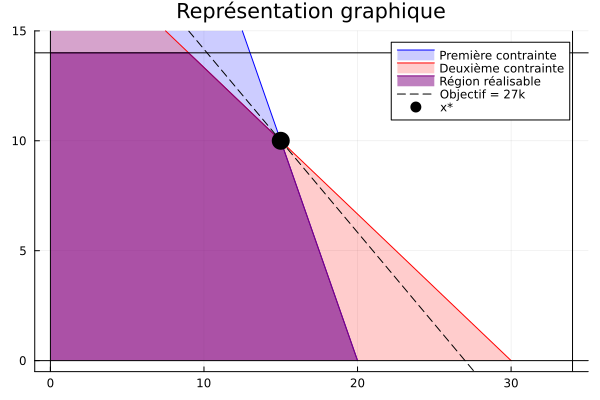

In [7]:
plot(t -> (160-8*t)/4, 0, 160/8, fill = (0, 0.2, :blue), color = :blue, label = "Première contrainte")
plot!(t->(120-4*t)/6, 0, 120/4, fill = (0, 0.2, :red), color = :red, label = "Deuxième contrainte")
plot!(t->min((120-4*t)/6, (160-8*t)/4, 14), 0, 160/8,
    fill = (0, 0.5, :purple), color = :purple, label = "Région réalisable")
vline!([0, 34], color = :black, label = "")
hline!([0, 14], color = :black, label = "")
plot!(ylims = (-0.5, 15))
plot!(t -> (27000 - 1000*t)/1200, color = :black, label = "Objectif = 27k", linestyle = :dash)
scatter!([15], [10], label = "x*", color = :black, markersize = 10)
plot!(title = "Représentation graphique")

**(b)** Déterminez les variables de base associées à chaque point extrème, en associant au besoin les variables d'écart ou de surplus.

**(c)** Résoudre le problème avec l'algorithme du simplexe (forme tableau).

Nous mettons tout d'abord le programme sous forme standard.

\begin{align*}
- \min_x\ & -1000 x_1 - 1200 x_2 \\
\text{t.q. } & 8x_1 + 4x_2 + s_1 = 160 \\
& 4x_1 + 6x_2 + s_2 = 120 \\
& x_1 + s_3 = 34 \\
& x_2 + s_4 = 14 \\
& x_1, x_2, s_1,s_2,s_3,s_4 \geq 0.
\end{align*}

Ceci donne comme premier tableau du simplexe:

\begin{align*}
\begin{array}{c|cccccc|c}
& x_1 & x_2 & s_1 & s_2 & s_3 & s_4 & \text{T.D.}\\
\hline
s_1 & 8 & 4 & 1 & 0 & 0 & 0 & 160 \\
s_2 & 4 & 6 & 0 & 1 & 0 & 0 & 120 \\
s_3 & 1 & 0 & 0 & 0 & 1 & 0 & 34 \\
s_4 & 0 & \color{red}1 & 0 & 0 & 0 & 1 & 14 \\
\hline
-z  & -1000 & -1200 & 0 & 0 & 0 & 0 & 0\\
\end{array}
\end{align*}

$x_2$ entre et $s_4$ sort.

\begin{align*}
\begin{array}{c|cccccc|c}
& x_1 & x_2 & s_1 & s_2 & s_3 & s_4 & \text{T.D.}\\
\hline
s_1 & 8 & 0 & 1 & 0 & 0 & -4 & 104 \\
s_2 & \color{red}4 & 0 & 0 & 1 & 0 & -6 & 36 \\
s_3 & 1 & 0 & 0 & 0 & 1 & 0 & 34 \\
x_2 & 0 & 1 & 0 & 0 & 0 & 1 & 14 \\
\hline
-z  & -1\,000 & 0 & 0 & 0 & 0 & 1\,200 & 16\,800\\
\end{array}
\end{align*}

$x_1$ entre et $s_2$ sort.

\begin{align*}
\begin{array}{c|cccccc|c}
& x_1 & x_2 & s_1 & s_2 & s_3 & s_4 & \text{T.D.}\\
\hline
s_1 & 0 & 0 & 1 & -2 & 0 & \color{red}8 & 32 \\
x_1 & 1 & 0 & 0 & 1/4 & 0 & -3/2 & 9 \\
s_3 & 0 & 0 & 0 & -1/4 & 1 & 3/2 & 25 \\
x_2 & 0 & 1 & 0 & 0 & 0 & 1 & 14 \\
\hline
-z  & 0 & 0 & 0 & 250 & 0 & -300 & 25\,800\\
\end{array}
\end{align*}

$s_4$ entre et $s_1$ sort.

\begin{align*}
\begin{array}{c|cccccc|c}
& x_1 & x_2 & s_1 & s_2 & s_3 & s_4 & \text{T.D.}\\
\hline
s_4 & 0 & 0 & 1/8 & -1/4 & 0 & 1 & 4 \\
x_1 & 1 & 0 & 3/16 & -1/8 & 0 & 0 & 15 \\
s_3 & 0 & 0 & -3/16 & 1/8 & 1 & 0 & 19 \\
x_2 & 0 & 1 & -1/8 & 1/4 & 0 & 0 & 10 \\
\hline
-z  & 0 & 0 & 75/2 & 175 & 0 & 0 & 27\,000\\
\end{array}
\end{align*}

Donc, 
\begin{align*}
&x_1=15,\ x_2=10,\\
&s_1=s_2=0\\ 
&s_3=19,\ s_4=4 
\end{align*}
et la valeur optimale du problème est $z^{\star}=-27\,000$.

**(d)** Quel était le chemin pris par l'algorithme du simplexe?

Considérons tout d'abord l'implémentation en Julia du pivot.

In [14]:
function pivot!(M::Matrix, i::Int, j::Int)
    m, n = size(M)
    @assert M[i, j] != 0
    M[i, :] = M[i, :]/M[i, j]
    for k in setdiff(1:m, i)
        M[k, :] -= M[k, j] * M[i, :]
    end
    return M
end

pivot! (generic function with 1 method)

Nous pouvons a présent reproduire aisément les étapes du simplexe.

In [15]:
M = [8//1 4 1 0 0 0 160; 
    4 6 0 1 0 0 120;
    1 0 0 0 1 0 34;
    0 1 0 0 0 1 14;
    -1000 -1200 0 0 0 0 0;
]

5×7 Matrix{Rational{Int64}}:
     8//1      4//1  1//1  0//1  0//1  0//1  160//1
     4//1      6//1  0//1  1//1  0//1  0//1  120//1
     1//1      0//1  0//1  0//1  1//1  0//1   34//1
     0//1      1//1  0//1  0//1  0//1  1//1   14//1
 -1000//1  -1200//1  0//1  0//1  0//1  0//1    0//1

In [16]:
basis = [3,4,5,6]
entering, leaving = (2, 4)
basis[leaving] = entering
pivot!(M, leaving, entering)

5×7 Matrix{Rational{Int64}}:
     8//1  0//1  1//1  0//1  0//1    -4//1    104//1
     4//1  0//1  0//1  1//1  0//1    -6//1     36//1
     1//1  0//1  0//1  0//1  1//1     0//1     34//1
     0//1  1//1  0//1  0//1  0//1     1//1     14//1
 -1000//1  0//1  0//1  0//1  0//1  1200//1  16800//1

In [17]:
entering, leaving = (1, 2)
basis[leaving] = entering
pivot!(M, leaving, entering)

5×7 Matrix{Rational{Int64}}:
 0//1  0//1  1//1   -2//1  0//1     8//1     32//1
 1//1  0//1  0//1    1//4  0//1    -3//2      9//1
 0//1  0//1  0//1   -1//4  1//1     3//2     25//1
 0//1  1//1  0//1    0//1  0//1     1//1     14//1
 0//1  0//1  0//1  250//1  0//1  -300//1  25800//1

In [18]:
entering, leaving = (6, 1)
basis[leaving] = entering
pivot!(M, leaving, entering)

5×7 Matrix{Rational{Int64}}:
 0//1  0//1   1//8    -1//4  0//1  1//1      4//1
 1//1  0//1   3//16   -1//8  0//1  0//1     15//1
 0//1  0//1  -3//16    1//8  1//1  0//1     19//1
 0//1  1//1  -1//8     1//4  0//1  0//1     10//1
 0//1  0//1  75//2   175//1  0//1  0//1  27000//1

In [19]:
sol = zeros(Rational{Int}, 6)
sol[basis] = M[1:end-1, end]
sol

6-element Vector{Rational{Int64}}:
 15//1
 10//1
  0//1
  0//1
 19//1
  4//1

## Exercice 2
Déterminer toutes les solutions de base réalisables pour le système

\begin{align*}
2x_1 + 6x_2 + x_3 + x_4 &= 3 \\
6x_1 + 4x_2 + 3x_3 + 6x_4 &= 2 \\
x_j \geq 0,\ j = 1,2,3,4. &
\end{align*}

On commence à énumérer toutes les combinaisons possibles. Soient,
\begin{align*}
A=
\begin{pmatrix}
2 & 6 & 1 & 1 \\
6 & 4 & 3 & 6
\end{pmatrix},
\qquad
b = 
\begin{pmatrix}
3\\
2
\end{pmatrix}.
\end{align*}

\begin{align*}
\begin{array}{ccc}
%B_1
\begin{aligned}
B_1 = 
\begin{pmatrix}
2 & 6 \\
6 & 4
\end{pmatrix},
\end{aligned}
& \text{Rang} \left(B_1 \right) = 2, &
B_1^{-1} b =
\begin{pmatrix}
0\\
1/2
\end{pmatrix}
=
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}\\
%B_2
\begin{aligned}
B_2 = 
\begin{pmatrix}
2 & 1 \\
6 & 3
\end{pmatrix},
\end{aligned}
& \text{Rang} \left(B_2 \right) = 1, &
B_2 \text{ non-inversible}
\\
%B_3
\begin{aligned}
B_3 = 
\begin{pmatrix}
2 & 1 \\
6 & 6
\end{pmatrix},
\end{aligned}
& \text{Rang} \left(B_3 \right) = 2, &
B_3^{-1} b =
\begin{pmatrix}
16/6\\
-7/3
\end{pmatrix}
=
\begin{pmatrix}
x_1\\
x_4
\end{pmatrix}\\
%B_4
\begin{aligned}
B_4 = 
\begin{pmatrix}
6 & 1 \\
4 & 3
\end{pmatrix},
\end{aligned}
& \text{Rang} \left(B_4 \right) = 2, &
B_4^{-1} b =
\begin{pmatrix}
1/2\\
0
\end{pmatrix}
=
\begin{pmatrix}
x_2\\
x_3
\end{pmatrix}\\
%B_5
\begin{aligned}
B_5 = 
\begin{pmatrix}
6 & 1 \\
4 & 6
\end{pmatrix},
\end{aligned}
& \text{Rang} \left(B_5 \right) = 2, &
B_5^{-1} b =
\begin{pmatrix}
1/2\\
0
\end{pmatrix}
=
\begin{pmatrix}
x_2\\
x_4
\end{pmatrix}\\
%B_6
\begin{aligned}
B_6 = 
\begin{pmatrix}
1 & 1 \\
3 & 6
\end{pmatrix},
\end{aligned}
& \text{Rang} \left(B_6 \right) = 2, &
B_6^{-1} b =
\begin{pmatrix}
16/3\\
-7/3
\end{pmatrix}
=
\begin{pmatrix}
x_3\\
x_4
\end{pmatrix}\\
\end{array}
\end{align*}

### Solutions de bases
$B_1, B_3, B_3, B_4, B_5, B_6 $

De plus, les bases réalisables de $A$ sont $B_1$, $B_4$, $B_5$. Les variables de bases associées à chaque base sont en rouge
\begin{align*}
\begin{array}{ccccc}
& x_1 & x_2 & x_3 & x_4\\  
B_1 & \color{red}0 & \color{red}{1/2} & 0 & 0\\
B_4 & 0 & \color{red}{1/2} & \color{red}0 & 0\\
B_5 & 0 &\color{red}{1/2} & 0 & \color{red}0\\
\end{array}
\end{align*}

## Exercice 3
Considérer le problème de programmation linéaire

\begin{align*}
\min\ & -x_1 - 2x_2 - 3x_3 + x_4 \\
\text{t.q. } & x_1 + 2x_2 + 3x_3 = 15 \\
& 2x_1 + x_2 + 5x_3 = 20 \\
& x_1 + 2x_2 + x_3 + x_4 = 10 \\
& x_j \geq 0,\ j = 1,2,3,4.
\end{align*}

À une certaine itération du simplexe, l'inverse de la base est

\begin{pmatrix}
 \frac{5}{7} & -\frac{3}{7} & 0 \\
-\frac{1}{7} &  \frac{2}{7} & 0 \\
-\frac{9}{7} &  \frac{4}{7} & 1
\end{pmatrix}

**(a)** Poursuivre la résolution de ce problème après avoir identifié le tableau du simplexe associé à cette base.

Soient 
\begin{align*}
A =
\begin{pmatrix}
1 & 2 & 3 & 0 \\
2 & 1 & 5 & 0 \\
1 & 2 & 1 & 1
\end{pmatrix}, 
\quad
B^{-1} =
\begin{pmatrix}
 \frac{5}{7} & -\frac{3}{7} & 0 \\
-\frac{1}{7} &  \frac{2}{7} & 0 \\
-\frac{9}{7} &  \frac{4}{7} & 1
\end{pmatrix}
\quad \text{et} \quad
b =
\begin{pmatrix}
 15 \\
 20 \\
 10
\end{pmatrix}
\end{align*}

On calcule 
\begin{align*}
B^{-1}  A &= 
\begin{pmatrix}
 \frac{5}{7} & -\frac{3}{7} & 0 \\
-\frac{1}{7} &  \frac{2}{7} & 0 \\
-\frac{9}{7} &  \frac{4}{7} & 1
\end{pmatrix}
\begin{pmatrix}
1 & 2 & 3 & 0 \\
2 & 1 & 5 & 0 \\
1 & 2 & 1 & 1
\end{pmatrix}
=
\begin{pmatrix}
-\frac{1}{7} & 1 & 0 & 0\\
\frac{3}{7} & 0 & 1 & 0\\
\frac{6}{7} & 0 & 0 & 1
\end{pmatrix}\\[10pt]
B^{-1}  b &= 
\begin{pmatrix}
 \frac{5}{7} & -\frac{3}{7} & 0 \\
-\frac{1}{7} &  \frac{2}{7} & 0 \\
-\frac{9}{7} &  \frac{4}{7} & 1
\end{pmatrix}
\begin{pmatrix}
 15 \\
 20 \\
 10
\end{pmatrix}
=
\begin{pmatrix}
\frac{15}{7} \\
\frac{25}{7} \\
\frac{15}{7} 
\end{pmatrix}
\end{align*}

Dès lors, les variables de base sont $x_2$, $x_3$, $x_4$, et la solution de base est $(0, 15/7, 25/7 15/7)$. 

Le tableau du simplexe correspondant est 
\begin{align*}
\begin{array}{c|cccc|c}
& x_1 & x_2 & x_3 & x_4 & \text{T.D.}\\
\hline
x_2 & -\frac{1}{7} & 1 & 0 & 0 & \frac{15}{7} \\
x_3 & \frac{3}{7} & 0 & 1 & 0 & \frac{25}{7} \\
x_4 & \frac{6}{7} & 0 & 0 & 1 & \frac{15}{7} \\
\hline
-z & -1 & -2 & -3 & 1 & 0
\end{array}
\end{align*}

Il reste cependant à annuler les coûts réduits associés dans ce tableau, en ajoutant à la dernière ligne une combinaison linéaire appropriée des lignes correspondantes aux contraintes linéaires du programme.

Nous obtenons
\begin{align*}
\begin{array}{c|cccc|c}
& x_1 & x_2 & x_3 & x_4 & \text{T.D.}\\
\hline
x_2 & -\frac{1}{7} & 1 & 0 & 0 & \frac{15}{7} \\
x_3 & \frac{3}{7} & 0 & 1 & 0 & \frac{25}{7} \\
x_4 & \color{red}{\frac{6}{7}} & 0 & 0 & 1 & \frac{15}{7} \\
\hline
-z  & -\frac{6}{7} & 0 & 0 & 0 & \frac{90}{7}
\end{array}
\end{align*}

Faisons une itération du simplexe. 

$x_1$ entre et $x_4$ sort.

\begin{align*}
\begin{array}{c|cccc|c}
& x_1 & x_2 & x_3 & x_4 & \text{T.D.}\\
\hline
x_2 & 0 & 1 & 0 & \frac{1}{6} & \frac{5}{2} \\
x_3 & 0 & 0 & 1 & -\frac{1}{2} & \frac{5}{2} \\
x_1 & 1 & 0 & 0 & \frac{7}{6} & \frac{5}{2} \\
\hline
-z  & 0 & 0 & 0 & 1 & \frac{105}{7}
\end{array}
\end{align*}

Il n'y a plus de coût réduit négatif, et par conséquent la solution est optimale, avec, 
\begin{align*}
&x_1=\frac{5}{2},\ x_2=\frac{5}{2},\\[8pt]
&x_3=\frac{5}{2},\ x_4=0.
\end{align*}
La valeur optimale du problème est $z^{\star}=-\frac{105}{7}$.

**(b)** Supposons que le terme de droite de la troisième contrainte devienne égal à 8:

Le problème devient alors
\begin{align*}
\min\ & -x_1 - 2x_2 - 3x_3 + x_4 \\
\text{t.q. } & x_1 + 2x_2 + 3x_3 = 15 \\
& 2x_1 + x_2 + 5x_3 = 20 \\
& x_1 + 2x_2 + x_3 + x_4 = 8 \\
& x_j \geq 0,\ j = 1,2,3,4.
\end{align*}

La solution de base optimale obtenue au point précédent demeure-t-elle réalisable?
Quelle est la modification de la valeur optimale de la fonction économique?

La base optimale trouvée en **(a)** est la suivante
\begin{align*}
B^\star =
\begin{array}{ccc}
x_2 & x_3 & x_1\\
\left(
\begin{array}{c}
2 \\
1 \\
2
\end{array}
\right.
&
\begin{array}{c}
3 \\
5 \\
1 
\end{array}
&
\left.
\begin{array}{c}
1 \\
2 \\
1 
\end{array}
\right)
\end{array}
\end{align*}

La base optimale reste réalisable si $x_B = {B^{\star}}^{-1} b \ge 0$.

On calcule

\begin{align*}
{B^{\star}}^{-1} =
\begin{pmatrix}
\frac{1}{2} & -\frac{1}{3} & \frac{1}{6} \\
\frac{1}{2} & 0 & -\frac{1}{2} \\
-\frac{3}{2} & \frac{2}{3} & \frac{7}{6} 
\end{pmatrix}
\end{align*}

\begin{align*}
{B^{\star}}^{-1}b =
\begin{pmatrix}
\frac{13}{6} \\
\frac{7}{2} \\
\frac{1}{6}
\end{pmatrix}
\end{align*}

Et donc ${B^{\star}}^{-1}$ reste réalisable et l'objectif devient $\tilde{z} = -15$.

## Exercice 4
Considérer le problème de programmation linéaire suivant:
\begin{align*}
\min\ & x_1 + x_2 - 4x_3 \\
\text{t.q. } & x_1 + x_2 + 2x_3 \leq 9 \\
& x_1 + x_2 - x_3 \leq 2 \\
& -x_1 + x_2 + x_3 \leq 4 \\
& x_j \geq 0, j = 1,2,3.
\end{align*}
Utilisons les variables d'écart $x_4$, $x_5$, $x_6$ pour transformer le problème sous forme standard.
À une itération du simplexe, nous retrouvons le tableau suivant

\begin{align*}
\begin{array}{c|cccccc|c}
& x_1 & x_2 & x_3 & x_4 & x_5 & x_6 & b \\
\hline
x_1 & 1 & -\frac{1}{3} & 0 & \frac{1}{3} & 0 & -\frac{2}{3} & \frac{1}{3} \\
x_5 & 0 & a & 0 & 0 & 1 & 1 & d \\
x_3 & 0 & \frac{2}{3} & 1 & \frac{1}{3} & 0 & \frac{1}{3} & \frac{13}{3} \\
\hline
-z & 0 & b & 0 & c & 0 & 2 & e \\
\end{array}
\end{align*}

**(a)** Spécifier l'inverse de la base associée à ce tableau du simplexe.

$B^{-1}$ se lit directement dans le tableau. Les colonnes de $B^{-1}$ sont celles associées aux variables d'écart $x_4$, $x_5$  et $x_6$.

En effet, si on transforme le simplexe sous forme standard, on a la matrice des contraintes qui s'écrit comme suit

\begin{align*}
A=
\begin{pmatrix}
1 & 1 & 2 & 1 & 0 & 0\\
1 & 1 & -1 & 0 & 1 & 0\\
-1 & 1 & 1 & 0 & 0 & 1
\end{pmatrix}
=
\begin{bmatrix}
\tilde{A} & I_3
\end{bmatrix}.
\end{align*}

À une itération du simplexe, où la base courante est $B$, on associe un tableau de la forme 

\begin{align*}
B^{-1} A =
\begin{bmatrix}
B^{-1} \tilde{A} & B^{-1}
\end{bmatrix}.
\end{align*}

Donc,
\begin{align*}
B^{-1} = 
\begin{pmatrix}
\frac{1}{3} & 0 & -\frac{2}{3} \\
0 & 1 & 1 \\
\frac{1}{3} & 0 & \frac{1}{3} 
\end{pmatrix}
\end{align*}

*Remarque :* En général, sans la matrice identité dans $A$, on trouve $B$ en utilisant le fait  que $x_1$, $x_5$, $x_3$ sont des variables de base et alors 
\begin{align*}
B^{-1} =
\begin{pmatrix}
1 & 0 & 2 \\
1 & 1 & -1\\
-1 & 0 & 1
\end{pmatrix}^{-1}
\end{align*}

**(b)** Déterminer les valeurs de $a$, $b$, $c$, $d$, $e$.

On calcule

\begin{align*}
B^{-1} A =
\begin{pmatrix}
1 & -\frac{1}{3} & 0 & \frac{1}{3} & 0 & -\frac{2}{3} \\
0 & 2 & 0 & 0 & 1 & 1 \\
0 & \frac{2}{3} & 1 & \frac{1}{3} & 0 & \frac{1}{3} 
\end{pmatrix}
\end{align*}


\begin{align*}
b=
\begin{pmatrix}
\frac{1}{3} \\
6\\
\frac{13}{3} 
\end{pmatrix}
\end{align*}

Pour trouver les coût, 

\begin{align*}
\begin{array}{c|cccccc|c}
& x_1 & x_2 & x_3 & x_4 & x_5 & x_6 & \text{T.D.}\\
\hline
x_1 & 1 & -\frac{1}{3} & 0 & \frac{1}{3} & 0 & -\frac{2}{3} & \frac{1}{3} \\
x_5 & 0 & 2 & 0 & 0 & 1 & 1 & 6\\
x_3 & 0 & \frac{2}{3} & 1 & \frac{1}{3} & 0 & \frac{1}{3} & \frac{13}{3} \\
\hline
-z_0  & 1 & 1 & -4 & 0 & 0 & 0 & 0\\
-z  & 0 & \frac{12}{3} & 0 & 1 & 0 & \frac{2}{3} & 17
\end{array}
\end{align*}


Donc, $a=2$, $b=13/3$, $c=1$, $d=6$, $e=17$.

**(c)** La solution dans ce tableau est-elle optimale? Pourquoi? Si elle n'est pas optimale, poursuivre la résolution du problème pour identifier une solution optimale.

Les nouveaux coût sont tous positifs, la solution est donc optimale.

**(d)** Supposons que le vecteur des termes de droite est modifié avec le vecteur suivant $(\Delta, -\Delta, \Delta)^T$.
Quelle est la plus grande valeur que peut prendre $\Delta$ pour que la solution optimale du problème original demeure réalisable pour le nouveau problème ainsi généré, et quelle est la valeur optimale de ce nouveau 
problème?

On note 

\begin{align*}
\tilde{b} = b + 
\begin{pmatrix}
\Delta\\
-\Delta\\
\Delta
\end{pmatrix}.
\end{align*}

$B$ demeure réalisable si 
\begin{align*}
& x_B = B^{-1} b \ge 0\\[8pt]
\iff & 
\begin{pmatrix}
\frac{1}{3} \\
6\\
\frac{13}{3} 
\end{pmatrix}
+
\begin{pmatrix}
-\frac{\Delta}{3} \\
0\\
\frac{2\, \Delta}{3}
\end{pmatrix}
\ge 0\\[8pt]
\iff &
\Delta \le 1 \text{ et } \Delta \ge -\frac{13}{2}.
\end{align*}





Ainsi, la plus grande valeur est $\Delta = 1$.

Donc, 
\begin{align*}
\tilde{b} = 
\begin{pmatrix}
10 \\
1\\
5
\end{pmatrix},
\qquad 
x_B = 
\begin{pmatrix}
0\\
6\\
5
\end{pmatrix}
\quad \text{et} \quad 
\tilde{z} = -20
\end{align*}

## L'algorithme du simplexe en Julia

In [20]:
function pivot!(M::Matrix, i::Int, j::Int)
    m, n = size(M)
    @assert M[i, j] != 0
    M[i, :] = M[i, :]/M[i, j]
    for k in setdiff(1:m, i)
        M[k, :] -= M[k, j] * M[i, :]
    end
    return M
end

function getReducedCosts(M::Matrix)
    m, n = size(M)
    return M[end, 1:n-1]
end
function getxB(M::Matrix)
    m, n = size(M)
    return M[1:m-1, end]
end
function enteringVar(M::Matrix)
    rc = getReducedCosts(M)
    index = argmin(rc)
    return rc[index] >= 0 ? -1 : index
end
function exitingVarIndex(M::Matrix{T}, enteringVar::Int) where T
    col = M[1:end-1, enteringVar]
    xB = getxB(M)
    m, n = size(M)
    index = -1
    val = T(Inf)
    for i in 1:m-1
        if (col[i] > 0) && (xB[i]/col[i] < val)
            val = xB[i]/col[i]
            index = i
        end
    end
    return index
end
function isOneHot(v::Vector)
    n = length(v)
    return (sum(iszero, v) == n-1) && (sum(isone, v) == 1)
end 
function isoptimal(M)
    return enteringVar(M) == -1
end
function findInitialBasis!(M::Matrix)
    m, n = size(M)
    m-=1
    n-=1
    basis = [-1 for _ in 1:m]
    for i in 1:n
        if isOneHot(M[1:end-1, i])
            index = findfirst(isone, M[:, i])
            basis[index] = i
        end
    end
    @assert !any(t-> t == -1, basis) "problem not caconical"
    for i in 1:m
        j = basis[i]
        pivot!(M, i, j)
    end
    return basis
end
function simplexSolver(A::Matrix{T}, b::Vector, c::Vector; verbose::Bool = false) where T
    M = [A b; c' 0]
    basis = findInitialBasis!(M)
    k = 1
    nmax = 1000
    while !isoptimal(M) && k < nmax
        k+=1
        verbose && display(M)
        entering = enteringVar(M)
        entering == -1 && (println("------------"); return T[-1, -1])
        leaving = exitingVarIndex(M, entering)
        leaving == -1 && (println("------------"); return T[-1, -1])
        verbose && @show (entering, leaving)
        basis[leaving] = entering
        pivot!(M, leaving, entering)
    end
    verbose && display(M)
    m, n = size(M)
    xstar = zeros(T, n - 1)
    xstar[basis] = getxB(M)
    return xstar
end

simplexSolver (generic function with 1 method)

In [21]:
A=[8//1 4 1 0 0 0; 
    4 6 0 1 0 0;
    1 0 0 0 1 0;
    0 1 0 0 0 1;
]
c = [-1000, -1200, 0,0,0,0]
b=[160, 120,34,14]

4-element Vector{Int64}:
 160
 120
  34
  14

In [22]:
simplexSolver(A, b, c, verbose=true)

5×7 Matrix{Rational{Int64}}:
     8//1      4//1  1//1  0//1  0//1  0//1  160//1
     4//1      6//1  0//1  1//1  0//1  0//1  120//1
     1//1      0//1  0//1  0//1  1//1  0//1   34//1
     0//1      1//1  0//1  0//1  0//1  1//1   14//1
 -1000//1  -1200//1  0//1  0//1  0//1  0//1    0//1

(entering, leaving) = (2, 4)


5×7 Matrix{Rational{Int64}}:
     8//1  0//1  1//1  0//1  0//1    -4//1    104//1
     4//1  0//1  0//1  1//1  0//1    -6//1     36//1
     1//1  0//1  0//1  0//1  1//1     0//1     34//1
     0//1  1//1  0//1  0//1  0//1     1//1     14//1
 -1000//1  0//1  0//1  0//1  0//1  1200//1  16800//1

(entering, leaving) = (1, 2)


5×7 Matrix{Rational{Int64}}:
 0//1  0//1  1//1   -2//1  0//1     8//1     32//1
 1//1  0//1  0//1    1//4  0//1    -3//2      9//1
 0//1  0//1  0//1   -1//4  1//1     3//2     25//1
 0//1  1//1  0//1    0//1  0//1     1//1     14//1
 0//1  0//1  0//1  250//1  0//1  -300//1  25800//1

(entering, leaving) = (6, 1)


5×7 Matrix{Rational{Int64}}:
 0//1  0//1   1//8    -1//4  0//1  1//1      4//1
 1//1  0//1   3//16   -1//8  0//1  0//1     15//1
 0//1  0//1  -3//16    1//8  1//1  0//1     19//1
 0//1  1//1  -1//8     1//4  0//1  0//1     10//1
 0//1  0//1  75//2   175//1  0//1  0//1  27000//1

6-element Vector{Rational{Int64}}:
 15//1
 10//1
  0//1
  0//1
 19//1
  4//1